# Basis analysis

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt


from pyscf import gto,scf,ao2mo,mp,cc,fci,tools

In [5]:
basis = ['sto-3g','sto-6g','6-31g','cc-pvdz','aug-cc-pvdz']

energies = {}
energies["sto-3g"] = []
energies["sto-6g"] = []
energies["6-31g"] = []
energies["cc-pvdz"] = []
energies["aug-cc-pvdz"] = []

dist = np.arange(0.3, 3.5, .1)
alt=np.sqrt(dist**2 - (dist/2)**2)

for j in range(len(dist)):
    for i in range(len(basis)):
        geometry = "H .0 .0 .0; H .0 .0 " + str(dist[j]) + "; H .0 " + str(alt[j]) + " " + str(dist[j]/2)
        mol = gto.M(atom=geometry,charge=1,spin=0,basis=basis[i],symmetry=True,verbose=0)
    
        mf  = scf.RHF(mol)
        Ehf = mf.kernel() 
    
        fci_h3 = fci.FCI(mf)  #<- nei metodi correlati passiamo come argomento un conto di campo medio, HF
        e_fci = fci_h3.kernel()[0]
        energies[basis[i]].append(e_fci)

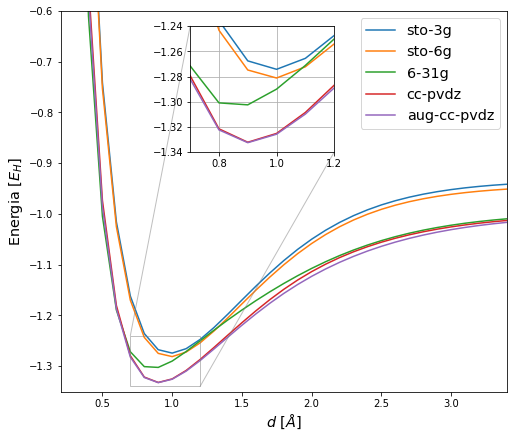

In [11]:
MIN = .7
MAX = 1.2

fig, ax = plt.subplots(figsize=[8, 7])

for (method,E) in energies.items():
    plt.plot(dist,E,label=method)
    
plt.xlabel(r"$d$ $[\AA]$", fontsize = 'x-large')
plt.ylabel(r"Energia $[E_H]$", fontsize = 'x-large')
plt.legend(fontsize = 'x-large')
plt.ylim([-1.35, -0.6])
plt.xlim([0.2, 3.4])

sub_axes = plt.axes([.35, .6, .25, .25])     

sub_axes.axis(ymin=-1.34,ymax=-1.24)
sub_axes.axis(xmin=MIN,xmax=MAX)

for (method,E) in energies.items():
    y = []
    x = []    
    for i in range(len(E)):
        if(dist[i] >= MIN and dist[i] <= MAX+1):
            x.append(dist[i])
            y.append(E[i])
    
    sub_axes.plot(x, y,label=method) 


ax.indicate_inset_zoom(sub_axes)

sub_axes.grid()

#plt.ylim([-1.3, .0])
#plt.xlim([0.5, 1.5])

#plt.savefig('figura.pdf')
plt.show()